In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

gender = pd.read_csv('Transformed Data Set.csv')

gender.head()




,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [70]:
for column in gender.columns:
    unique_values = gender[column].unique()
    print(f"'{column}'의 종류 : {unique_values}")

'Favorite Color'의 종류 : ['Cool' 'Neutral' 'Warm']
'Favorite Music Genre'의 종류 : ['Rock' 'Hip hop' 'Folk/Traditional' 'Jazz/Blues' 'Pop' 'Electronic'
 'R&B and soul']
'Favorite Beverage'의 종류 : ['Vodka' 'Wine' 'Whiskey' "Doesn't drink" 'Beer' 'Other']
'Favorite Soft Drink'의 종류 : ['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']
'Gender'의 종류 : ['F' 'M']


In [71]:
# 중복되는 값 제거
unique_values = pd.unique(gender.values.ravel('K'))
print(unique_values)

['Cool' 'Neutral' 'Warm' 'Rock' 'Hip hop' 'Folk/Traditional' 'Jazz/Blues'
 'Pop' 'Electronic' 'R&B and soul' 'Vodka' 'Wine' 'Whiskey'
 "Doesn't drink" 'Beer' 'Other' '7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'F'
 'M']


In [72]:
# 데이터 전처리
replace_dict = {
    'Cool':1, 'Neutral':2, 'Warm':3,

    'Rock':1,
    'Hip hop':2,
    'Folk/Traditional':3,
    'Jazz/Blues':4,
    'Pop':5,
    'Electronic':6,
    'R&B and soul':7,

    'Vodka':1,
    'Wine':2,
    'Whiskey':3,
    "Doesn't drink":4,
    'Beer':5,
    'Other':0,

    '7UP/Sprite':1, 'Coca Cola/Pepsi':2, 'Fanta' :3,

    'F':0, 'M':1
}

gender_replaced = gender.replace(replace_dict)

gender_replaced.head()



,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,1,1,1,0
1,2,2,1,2,0
2,3,1,2,2,0
3,3,3,3,3,0
4,1,1,1,2,0


In [73]:
# 데이터와 타켓 분류
data = gender_replaced.drop(columns="Gender").to_numpy()
target = gender_replaced[["Gender"]].to_numpy()

print("Data shape:", data.shape)
print("Target shape:", target.shape)

Data shape: (66, 4)
Target shape: (66, 1)


In [97]:
# 데이터 훈련데이터와 테이트데이터로 분류
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.1, random_state=42)
print(train_input.shape, test_input.shape)

(59, 4) (7, 4)


In [98]:
# 결정트리 생성 및 학습
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(random_state=42)

In [99]:
# 정확도 출력
print("훈련 값(과하게 훈련에만 정확함)")
print(dt.score(train_input, train_target))
print("테스트값")
print(dt.score(test_input, test_target))

훈련 값(과하게 훈련에만 정확함)
0.9661016949152542
테스트값
0.7142857142857143


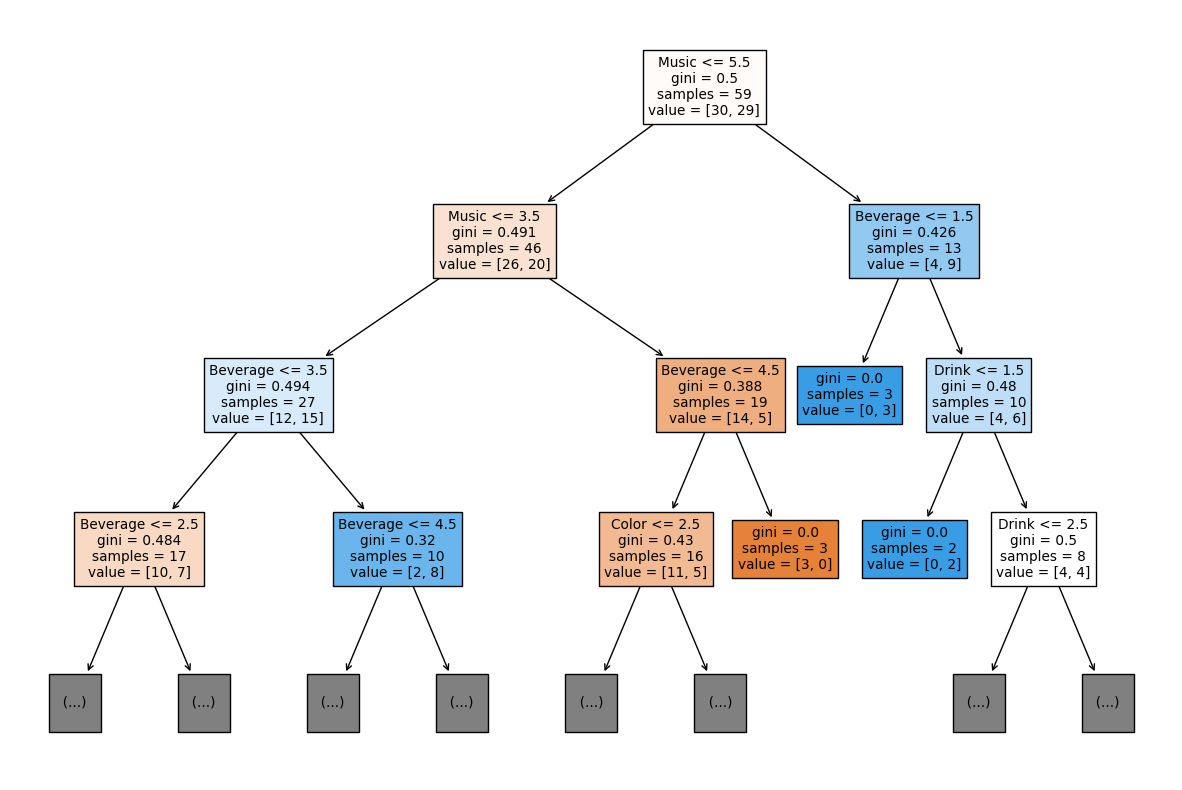

In [100]:
# 결정 트리 시각화
plt.figure(figsize=(15,10))
plot_tree(dt, max_depth=3, filled=True, feature_names=['Color', 'Music', 'Beverage', 'Drink'])
plt.show()

In [112]:
print("feature_importances_:중요도 출력 값이 높을수록 중요함")
print("[    색깔       음악        술        음료   ]")
print(dt.feature_importances_)

feature_importances_:중요도 출력 값이 높을수록 중요함
[    색깔       음악        술        음료   ]
[0.10729136 0.19101557 0.45827029 0.24342278]


In [114]:
predictions = dt.predict([[1,2,3,2]])
print("데이터 전처리에서 여성은 0 남성은 1")
print(predictions)
print("이 데이터는 여성일 확률이 높다")

데이터 전처리에서 여성은 0 남성은 1
[0]
이 데이터는 여성일 확률이 높다
